In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

In [29]:
def load_all_data(dir, filecnt=54):
    data = [None]*10
    t = np.zeros((10, filecnt), int)
    for p in range(10):
        d = [None]*filecnt
        for i in range(filecnt):
            d[i] = np.load(f"{dir}/{p}/{i+1}.npy")
            t[p,i] = d[i].shape[0]
        data[p] = d
    return data, t

def match_length(d, t:int):
    """
    return (pattern, N, times(t), 2) shape numpy array
    """
    x = np.zeros((len(d), len(d[0]), t, 2), np.float64)
    target_timepoints = np.linspace(0, 1, t)
    for r in range(len(d)):
        for c in range(len(d[r])):
            origin_timepoints = np.linspace(0, 1, d[r][c].shape[0])
            x[r, c, :, 0] = np.interp(target_timepoints, origin_timepoints, d[r][c][:,0])
            x[r, c, :, 1] = np.interp(target_timepoints, origin_timepoints, d[r][c][:,1])
    return x      

def apply_normalize(d):
    for r in range(len(d)):
        for c in range(len(d[r])):
            d[r][c][:,0] = d[r][c][:,0] - d[r][c][0,0]
            d[r][c][:,1] = d[r][c][:,1] - d[r][c][0,1]
    
def plot_data(d):
    plt.figure(figsize=(20,4))
    plt.subplot(2,1,1)
    gca = plt.gca()
    gca.plot(d[:,0])
    plt.subplot(2,1,2)
    gca = plt.gca()
    gca.plot(d[:,1])
    plt.tight_layout()
    plt.show()

In [51]:
data, t = load_all_data("/home/user/workspace/research/eye-writing/self_data/")
apply_normalize(data)
x = match_length(data, 128)

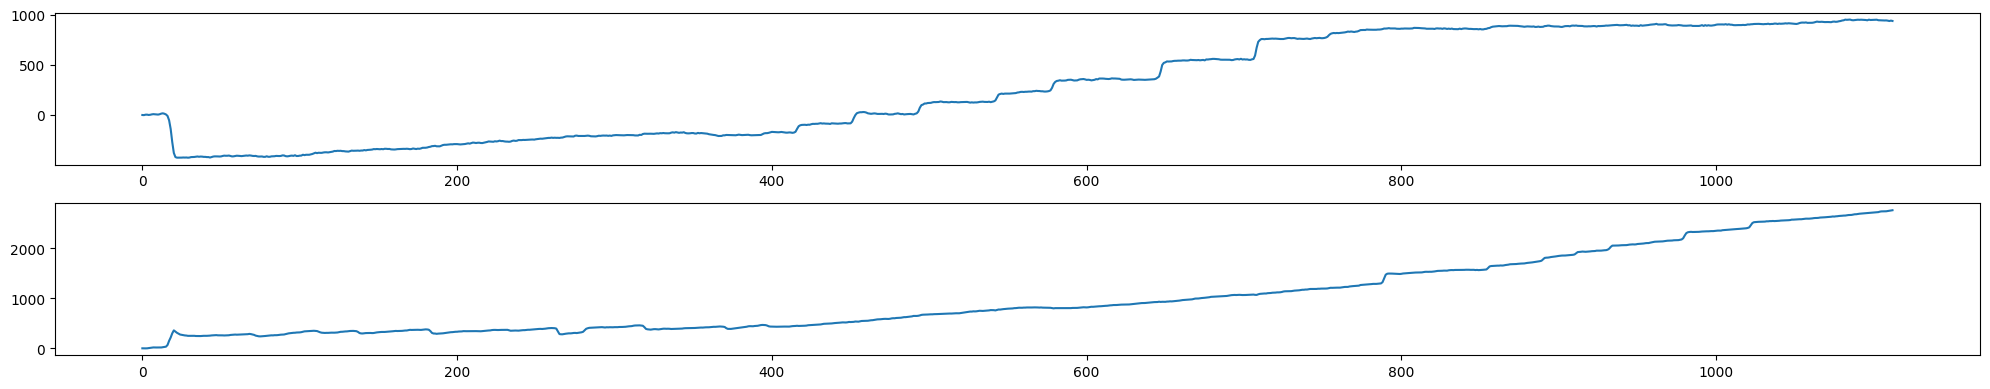

In [73]:
p = 0
i = 12
plot_data(data[p][i])

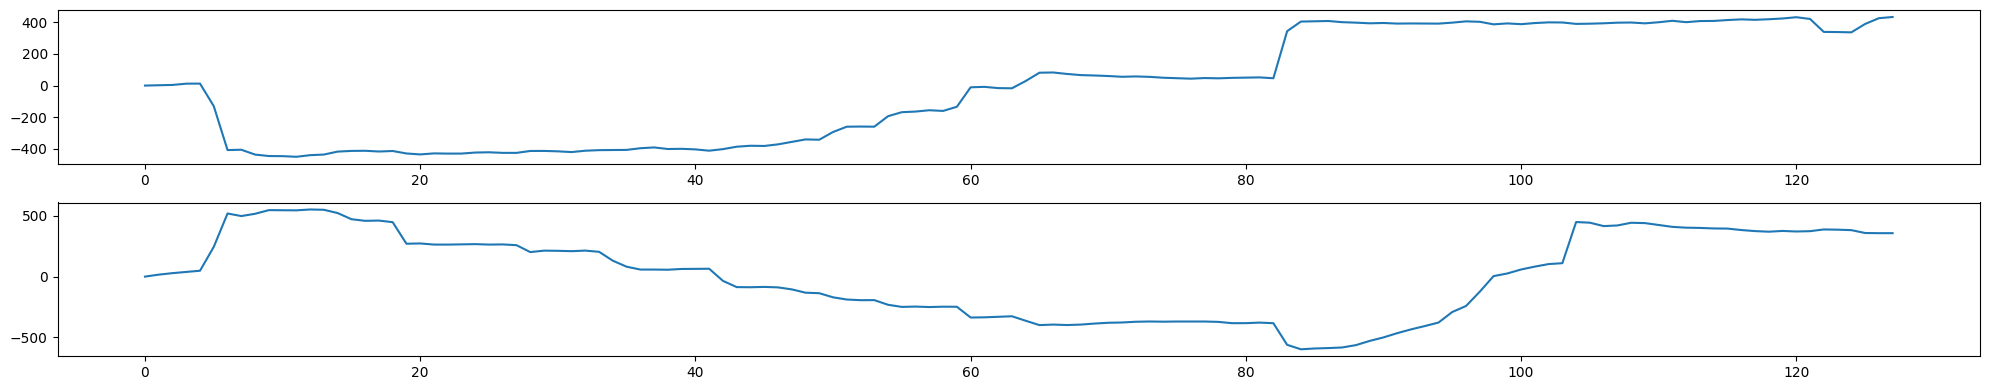

In [53]:
plot_data(x[p,i,:,:])